In [79]:
# https://www.kaggle.com/devsubhash/television-brands-ecommerce-dataset
# !kaggle --version
# !kaggle --help
# !kaggle datasets download -d devsubhash/television-brands-ecommerce-dataset
# !unzip television-brands-ecommerce-dataset.zip
# !rm television-brands-ecommerce-dataset.zip
# !kaggle competitions submit -c devsubhash/television-brands-ecommerce-dataset -f submission.csv -m "HoGent"

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import autosklearn
from autosklearn.regression import AutoSklearnRegressor
from sklearn.model_selection import train_test_split

In [81]:
def strip_headers(df, columns):
  for item in columns:
    new_header = item.strip().replace(" ","")
    if (new_header != item):
      df[new_header] = df[item]
      df = df.drop([item], axis="columns")
  return df

def strip_columns(df, columns):
  for item in columns:
    df[item] = df[item].apply(lambda x: x.strip())
    df[item] = df[item].apply(lambda x: x.replace(" ",""))
    return df

def get_dummies(df, columns):
  df = pd.get_dummies(df, columns=columns)
  return df


In [82]:
df = pd.read_csv("TV_Final.csv")

In [83]:
df = strip_headers(df, df.columns)

In [84]:
df.head()

,Brand,Resolution,Rating,Size,SellingPrice,OriginalPrice,OperatingSystem
0,TOSHIBA,Ultra HD LED,4.3,55,37999,54990,VIDAA
1,TCL,QLED Ultra HD,4.4,55,52999,129990,Android
2,realme,HD LED,4.3,32,13999,17999,Android
3,Mi,HD LED,4.4,32,14999,19999,Android
4,realme,HD LED,4.3,32,12999,21999,Android


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            912 non-null    object 
 1   Resolution       912 non-null    object 
 2   Rating           692 non-null    float64
 3   Size             912 non-null    int64  
 4   SellingPrice     912 non-null    int64  
 5   OriginalPrice    912 non-null    int64  
 6   OperatingSystem  901 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


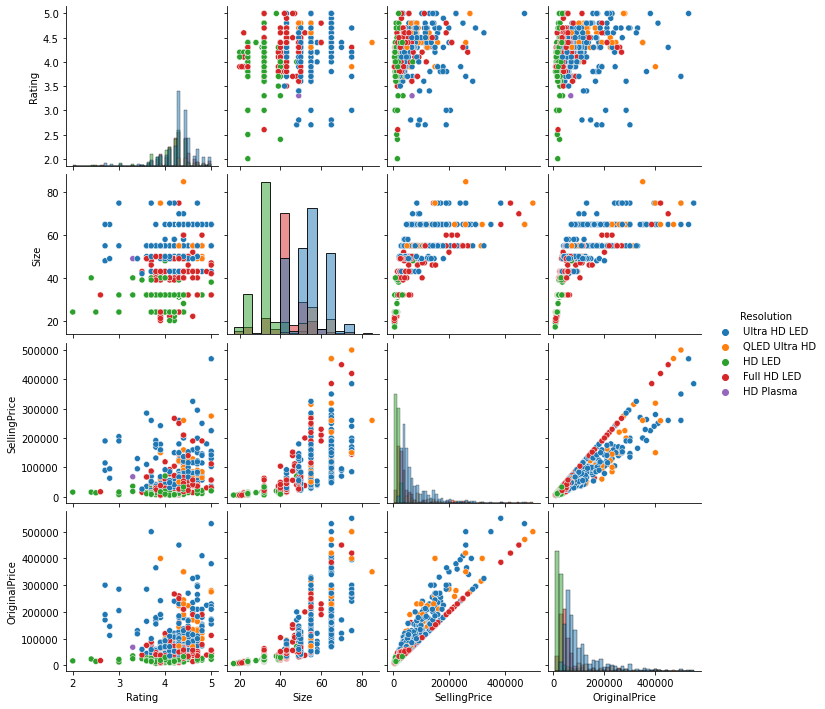

In [86]:
plot = sns.pairplot(
  df,
  # hue="brand",
  hue="Resolution",
  # diag_kind="kde",
  diag_kind="hist",
  # x_vars=["year", "mileage", "engineSize", "price"],
  # y_vars=["year", "mileage", "engineSize", "price"],
  # corner=True
);

In [87]:
y = df["SellingPrice"]
X = df.drop(["SellingPrice"], axis="columns")

In [88]:
columns=["Brand", "Resolution", "OperatingSystem"]
X_with_dummies = get_dummies(X, columns)

In [89]:
X_model, X_val, y_model, y_val = train_test_split(X_with_dummies,y,test_size=0.30, random_state=42)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.30, random_state=42)

In [91]:
def get_and_fit_model(X_train, y_train, dataset_name, time_left_for_this_task=30, per_run_time_limit=10):
  model = AutoSklearnRegressor(
    # time_left_for_this_task=30,
    # per_run_time_limit=10
    time_left_for_this_task=time_left_for_this_task,
    per_run_time_limit=per_run_time_limit
  )
  model.fit(X_train, y_train, dataset_name=dataset_name)
  return model

In [92]:
X_train.shape, type(np.array(X_train))
X_train.head()

,Rating,Size,OriginalPrice,Brand_AISEN,Brand_Acer,Brand_Adsun,Brand_Akai,Brand_BPL,Brand_Blaupunkt,Brand_Candes,...,Resolution_HD Plasma,Resolution_QLED Ultra HD,Resolution_Ultra HD LED,OperatingSystem_Android,OperatingSystem_FireTV OS,OperatingSystem_HomeOS,OperatingSystem_Linux,OperatingSystem_Tizen,OperatingSystem_VIDAA,OperatingSystem_WebOS
272,4.6,55,94900,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
751,3.9,43,40000,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
253,4.7,65,294900,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
838,5.0,32,56990,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
764,3.8,32,19990,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [93]:
y_train.shape, type(np.array(y_train))

((446,), numpy.ndarray)

In [94]:
model = get_and_fit_model(np.array(X_train), np.array(y_train), dataset_name="TelevisionBrandECommerce", time_left_for_this_task=120, per_run_time_limit=30)

In [95]:
def get_scores_and_predictions(model, X_train, y_train, X_test, y_test, X_sub):
  training_score = model.score(X_train, y_train)
  testing_score = model.score(X_test, y_test)
  test_predictions = model.predict(X_test)
  predictions = model.predict(X_sub)
  return training_score, testing_score, test_predictions, predictions

In [96]:
training_score, testing_score, test_predictions, predictions = get_scores_and_predictions(model, X_train, y_train, X_test, y_test, X_val)
print("training_score: {training_score}".format(training_score=training_score))
print("testing_score: {testing_score}".format(testing_score=testing_score))
print("test_predictions: {test_predictions}".format(test_predictions=test_predictions))
print("predictions: {predictions}".format(predictions=predictions))

training_score: 0.9789929605388384
testing_score: 0.8242663650540067
test_predictions: [ 15371.62744141 103053.17626953 195479.32861328  12552.76412964
  35059.61083984  15431.62637329   9598.08154297  16697.1550293
  31505.99462891  16793.11291504  21248.20568848  21180.30480957
  33914.17077637  24642.04614258  20485.2845459   13867.67401123
  46101.88146973 111757.92480469  43599.78686523 129124.46142578
  49074.22680664  25087.7869873    8836.07220459  14201.63818359
  38692.90466309  37454.35705566  19655.48388672  33785.64001465
  23763.39422607  38158.95666504  13651.98907471  56976.96362305
   6835.37892151  49737.36743164 105192.20703125  20003.99920654
   8417.13453674  37007.14746094  33409.98596191 175252.99707031
  36276.98632812 172671.51660156 184877.50488281  18182.2734375
  17655.44119263 165161.93945312  60465.51403809  44145.89111328
  34054.26123047  27565.81481934  37378.28271484 113438.78588867
  27905.42626953  66665.79467773  35184.85083008  34513.47167969
  259

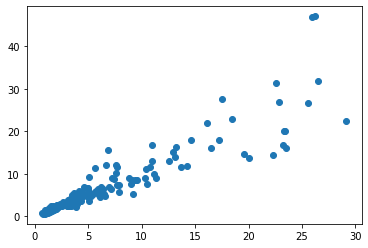

In [97]:
plt.scatter((test_predictions/10000), (y_test/10000))

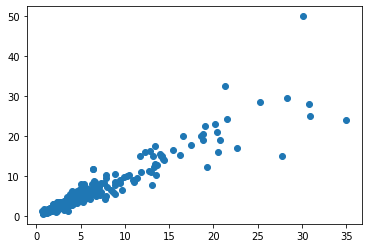

In [98]:
plt.scatter((predictions/10000), (y_val/10000))

In [99]:
def get_metrics(y_test, test_predictions):
  # print(autosklearn.metrics.REGRESSION_METRICS)
  mean_squared_error=sklearn.metrics.mean_squared_error(y_test, test_predictions)
  MSE = np.mean((y_test - test_predictions) ** 2)
  mean_absolute_error=sklearn.metrics.mean_absolute_error(y_test, test_predictions)
  MAE = np.mean(np.absolute(y_test - test_predictions))
  # r2=autosklearn.metrics.r2(y_test, test_predictions)
  r2=sklearn.metrics.r2_score(y_test, test_predictions)
  return mean_squared_error, MSE, mean_absolute_error, MAE, r2

In [100]:
mean_squared_error, MSE, mean_absolute_error, MAE, r2 = get_metrics(np.array(y_train), np.array(model.predict(X_train)))
# np.mean((np.array(y_test['price']) - np.array(test_predictions)) ** 2)
print("mean_squared_error: {mean_squared_error}".format(mean_squared_error=mean_squared_error))
print("MSE: {MSE}".format(MSE=MSE))
print("mean_absolute_error: {mean_absolute_error}".format(mean_absolute_error=mean_absolute_error))
print("MAE: {MAE}".format(MAE=MAE))
print("r2: {r2}".format(r2=r2))

mean_squared_error: 83718279.35316817
MSE: 83718279.35316817
mean_absolute_error: 5569.797315212643
MAE: 5569.797315212643
r2: 0.9789929605388384


In [101]:
mean_squared_error, MSE, mean_absolute_error, MAE, r2 = get_metrics(np.array(y_test), np.array(test_predictions))
# np.mean((np.array(y_test['price']) - np.array(test_predictions)) ** 2)
print("mean_squared_error: {mean_squared_error}".format(mean_squared_error=mean_squared_error))
print("MSE: {MSE}".format(MSE=MSE))
print("mean_absolute_error: {mean_absolute_error}".format(mean_absolute_error=mean_absolute_error))
print("MAE: {MAE}".format(MAE=MAE))
print("r2: {r2}".format(r2=r2))

mean_squared_error: 955389287.949305
MSE: 955389287.949305
mean_absolute_error: 14232.116358280182
MAE: 14232.116358280182
r2: 0.8242663650540067
